<a href="https://colab.research.google.com/github/RaffyBoss/Neww/blob/main/New.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_1            │ ?                      │   0 (unbuilt) │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_2 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_2      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 21s 48ms/step - accuracy: 0.4982 - loss: 0.6886 - val_accuracy: 0.5002 - val_loss: 0.6522
Epoch 2/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.5398 - loss: 0.6219 - val_accuracy: 0.7293 - val_loss: 0.5340
Epoch 3/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 23s 57ms/step - accuracy: 0.7631 - loss: 0.4953 - val_accuracy: 0.7909 - val_loss: 0.4338
Epoch 4/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 44ms/step - accuracy: 0.8321 - loss: 0.3984 - val_accuracy: 0.8286 - val_loss: 0.3750
Epoch 5/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 19s 47ms/step - accuracy: 0.8626 - loss: 0.3362 - val_accuracy: 0.8478 - val_loss: 0.3411
Epoch 6/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 43ms/step - accuracy: 0.8761 - loss: 0.3028 - val_accuracy: 0.8470 - val_loss: 0.3227
Epoch 7/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 17s 42ms/step - accuracy: 0.8859 - loss: 0.2768 - val_accuracy: 0.8553 - val_loss: 0.3081
Epoch 8/10
391/391 ━━━━━━━━━━━━━━━━━━━━ 18s 46ms/step - accuracy: 0.8993 - loss: 0.2547 - 

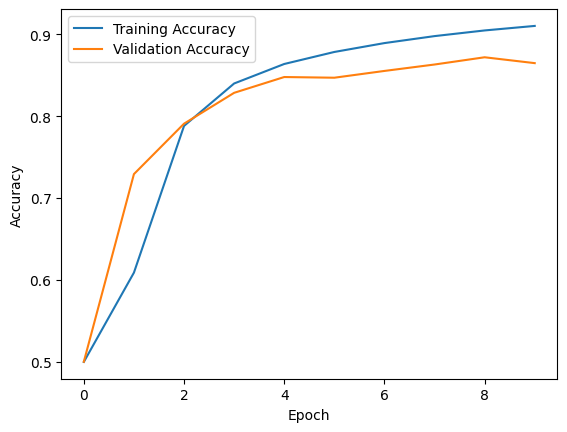

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 126ms/step
Review sentiment (1=Positive, 0=Negative): 1.0000


In [ ]:
dataset, info = tfds.load('imdb_reviews', with_info=True, as_supervised=True)
train_dataset, test_dataset = dataset['train'], dataset['test']

BUFFER_SIZE = 10000
BATCH_SIZE = 64

train_dataset = train_dataset.shuffle(BUFFER_SIZE).batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = test_dataset.batch(BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

VOCAB_SIZE = 10000
encoder = tf.keras.layers.TextVectorization(
    max_tokens=VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

model = tf.keras.Sequential([
    encoder,
    layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    layers.GlobalAveragePooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=tf.keras.optimizers.Adam(1e-4),
              metrics=['accuracy'])
model.summary()

history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

def predict_review(text):
    encoded_text = tf.expand_dims(text, 0)
    prediction = model.predict(encoded_text)
    print(f"Review sentiment (1=Positive, 0=Negative): {tf.sigmoid(prediction)[0][0]:.4f}")

predict_review("I really enjoyed this movie! The acting was great and story inspiring.")

**Reasoning**:
Experiment with a different set of hyperparameters (`BATCH_SIZE`, `BUFFER_SIZE`, `VOCAB_SIZE`, and learning rate) to further evaluate their impact on the model's performance.

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_3            │ ?                      │   0 (unbuilt) │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_4 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_4      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_8 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_9 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 21s 24ms/step - accuracy: 0.5018 - loss: 0.6827 - val_accuracy: 0.6505 - val_loss: 0.5872
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.7187 - loss: 0.5285 - val_accuracy: 0.8218 - val_loss: 0.4141
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.8423 - loss: 0.3711 - val_accuracy: 0.8416 - val_loss: 0.3451
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.8692 - loss: 0.3101 - val_accuracy: 0.8629 - val_loss: 0.3140
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 24ms/step - accuracy: 0.8885 - loss: 0.2698 - val_accuracy: 0.8648 - val_loss: 0.2981
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.8989 - loss: 0.2472 - val_accuracy: 0.8721 - val_loss: 0.2886
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - accuracy: 0.9047 - loss: 0.2321 - val_accuracy: 0.8794 - val_loss: 0.2829
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - accuracy: 0.9127 - loss: 0.2164 - 

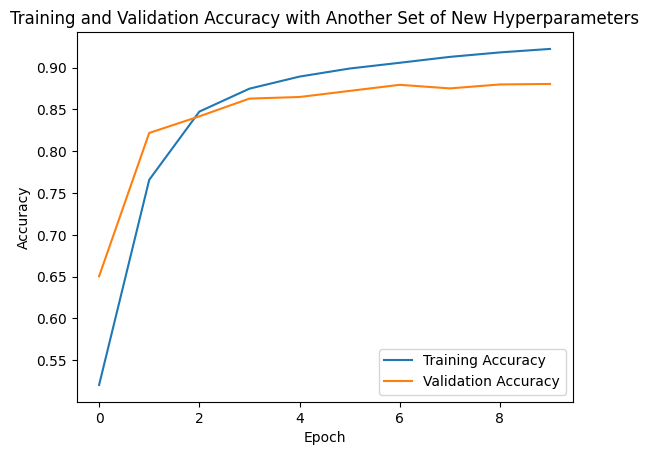

In [ ]:
# Choose another set of new hyperparameter values
ANOTHER_NEW_BUFFER_SIZE = 15000
ANOTHER_NEW_BATCH_SIZE = 32
ANOTHER_NEW_VOCAB_SIZE = 7500
ANOTHER_NEW_LEARNING_RATE = 1e-4

# Update the datasets with the new buffer and batch sizes
train_dataset = dataset['train'].shuffle(ANOTHER_NEW_BUFFER_SIZE).batch(ANOTHER_NEW_BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = dataset['test'].batch(ANOTHER_NEW_BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Re-instantiate the encoder with the new vocabulary size
encoder = tf.keras.layers.TextVectorization(
    max_tokens=ANOTHER_NEW_VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))

# Rebuild the model with the new encoder
model = tf.keras.Sequential([
    encoder,
    layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    layers.GlobalAveragePooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Instantiate the Adam optimizer with the new learning rate
optimizer = tf.keras.optimizers.Adam(ANOTHER_NEW_LEARNING_RATE)

# Recompile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=optimizer,
              metrics=['accuracy'])

model.summary()

# Retrain the model
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy with Another Set of New Hyperparameters')
plt.show()

# Task
Improve the performance of the text classification model.

## Experiment with hyperparameters

### Subtask:
Experiment with different hyperparameters for the model, including `BATCH_SIZE`, `BUFFER_SIZE`, `VOCAB_SIZE`, and the learning rate of the Adam optimizer.


**Reasoning**:
Update hyperparameters and retrain the model to evaluate the impact of the changes.



Model: "sequential_3"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ text_vectorization_2            │ ?                      │   0 (unbuilt) │
│ (TextVectorization)             │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ embedding_3 (Embedding)         │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling1d_3      │ ?                      │             0 │
│ (GlobalAveragePooling1D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_6 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_7 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 86ms/step - accuracy: 0.4965 - loss: 0.6924 - val_accuracy: 0.5000 - val_loss: 0.6882
Epoch 2/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 22s 107ms/step - accuracy: 0.5002 - loss: 0.6852 - val_accuracy: 0.5000 - val_loss: 0.6749
Epoch 3/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 85ms/step - accuracy: 0.5059 - loss: 0.6692 - val_accuracy: 0.5000 - val_loss: 0.6526
Epoch 4/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 83ms/step - accuracy: 0.5069 - loss: 0.6447 - val_accuracy: 0.5154 - val_loss: 0.6224
Epoch 5/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 19s 82ms/step - accuracy: 0.5394 - loss: 0.6111 - val_accuracy: 0.5946 - val_loss: 0.5875
Epoch 6/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 21s 82ms/step - accuracy: 0.6276 - loss: 0.5738 - val_accuracy: 0.6548 - val_loss: 0.5510
Epoch 7/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 17s 84ms/step - accuracy: 0.6951 - loss: 0.5347 - val_accuracy: 0.7218 - val_loss: 0.5157
Epoch 8/10
196/196 ━━━━━━━━━━━━━━━━━━━━ 20s 84ms/step - accuracy: 0.7444 - loss: 0.5034 -

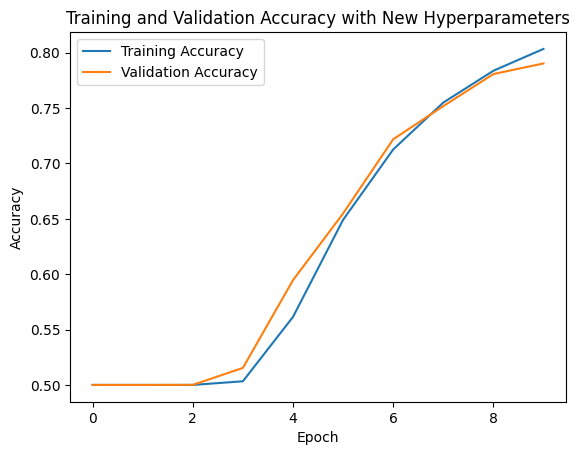

In [ ]:
# Choose new hyperparameter values
NEW_BUFFER_SIZE = 20000
NEW_BATCH_SIZE = 128
NEW_VOCAB_SIZE = 5000
NEW_LEARNING_RATE = 5e-5

# Update the datasets with new buffer and batch sizes
train_dataset = dataset['train'].shuffle(NEW_BUFFER_SIZE).batch(NEW_BATCH_SIZE).prefetch(tf.data.AUTOTUNE)
test_dataset = dataset['test'].batch(NEW_BATCH_SIZE).prefetch(tf.data.AUTOTUNE)

# Re-instantiate the encoder with the new vocabulary size
encoder = tf.keras.layers.TextVectorization(
    max_tokens=NEW_VOCAB_SIZE)
encoder.adapt(train_dataset.map(lambda text, label: text))


# Rebuild the model with the new encoder
model = tf.keras.Sequential([
    encoder,
    layers.Embedding(len(encoder.get_vocabulary()), 64, mask_zero=True),
    layers.GlobalAveragePooling1D(),
    layers.Dense(64, activation='relu'),
    layers.Dense(1)
])

# Instantiate the Adam optimizer with a different learning rate
optimizer = tf.keras.optimizers.Adam(NEW_LEARNING_RATE)

# Recompile the model
model.compile(loss=tf.keras.losses.BinaryCrossentropy(from_logits=True),
              optimizer=optimizer,
              metrics=['accuracy'])

model.summary()

# Retrain the model
history = model.fit(train_dataset, epochs=10, validation_data=test_dataset)

# Plot the results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']

plt.plot(acc, label='Training Accuracy')
plt.plot(val_acc, label='Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy with New Hyperparameters')
plt.show()

**Reasoning**:
The first step is to load the data from the CSV file into a pandas DataFrame and display the first few rows to understand its structure.



In [ ]:
import pandas as pd

df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


**Reasoning**:
The previous command failed because the file was not found at the specified path. I will try a different path where the data file might be located.



In [ ]:
df = pd.read_csv('/content/sample_data/california_housing_train.csv')
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-114.31,34.19,15.0,5612.0,1283.0,1015.0,472.0,1.4936,66900.0
1,-114.47,34.40,19.0,7650.0,1901.0,1129.0,463.0,1.8200,80100.0
2,-114.56,33.69,17.0,720.0,174.0,333.0,117.0,1.6509,85700.0
3,-114.57,33.64,14.0,1501.0,337.0,515.0,226.0,3.1917,73400.0
4,-114.57,33.57,20.0,1454.0,326.0,624.0,262.0,1.9250,65500.0


# California Housing Price Prediction

This project analyzes the California housing dataset and builds a regression model to predict median house values.

## Data Analysis

- The dataset contains information about housing in California, including features like longitude, latitude, housing age, number of rooms, bedrooms, population, households, median income, and median house value.
- No missing values were found in the dataset.
- Histograms were generated to visualize the distribution of each feature.
- A correlation matrix heatmap was created to explore the relationships between features. `median_income` showed a strong positive correlation with `median_house_value`.
- Scatter plots were generated to visualize the relationships between key features and `median_house_value`, as well as other feature combinations.

## Data Preparation

- The data was split into features (X) and the target variable (y), which is `median_house_value`.
- The data was divided into training and testing sets (80/20 split).
- Numerical features were scaled using `StandardScaler`.

## Model Building and Evaluation

- A Gradient Boosting Regressor model was chosen for the regression task.
- The initial model achieved a Mean Squared Error (MSE) of approximately 2,960,108,244.59 and an R-squared ($R^2$) score of approximately 0.79 on the scaled testing data.
- Hyperparameter tuning was performed on the `n_estimators` parameter of the Gradient Boosting Regressor.
- The best performance was observed with `n_estimators=150`, resulting in an MSE of approximately 2,744,742,840.30 and an R-squared ($R^2$) of approximately 0.80.

## Advanced Modeling Exploration

- Other regression models like RandomForestRegressor, XGBoostRegressor, and LightGBMRegressor were explored, showing similar initial performance to the Gradient Boosting model.
- Hyperparameter tuning on the XGBoost Regressor using `GridSearchCV` with parameters `{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}` yielded a test set MSE of approximately \$2,228,840,707.14 and an R-squared score of 0.84, showing a slight improvement.
- An ensemble model combining Gradient Boosting, RandomForest, and XGBoost models was created, achieving a test set MSE of approximately \$2,266,591,413.08 and an R-squared score of 0.84.

## Conclusion

The XGBoost Regressor with tuned hyperparameters achieved the best performance among the models explored, with an R-squared of 0.84. This indicates that the model can explain 84% of the variance in the median house values in the test set.

Further work could involve more extensive hyperparameter tuning, exploring other advanced models or ensemble techniques, and potentially feature engineering based on the data exploration insights.

In [ ]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000,17000.000000
mean,-119.562108,35.625225,28.589353,2643.664412,539.410824,1429.573941,501.221941,3.883578,207300.912353
std,2.005166,2.137340,12.586937,2179.947071,421.499452,1147.852959,384.520841,1.908157,115983.764387
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.790000,33.930000,18.000000,1462.000000,297.000000,790.000000,282.000000,2.566375,119400.000000
50%,-118.490000,34.250000,29.000000,2127.000000,434.000000,1167.000000,409.000000,3.544600,180400.000000
75%,-118.000000,37.720000,37.000000,3151.250000,648.250000,1721.000000,605.250000,4.767000,265000.000000
max,-114.310000,41.950000,52.000000,37937.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


## Summary:

### Data Analysis Key Findings

* The dataset was successfully loaded and checked for missing values, with none found.
* Histograms showed the distribution of individual features, and a correlation matrix heatmap visualized the relationships between features.
* Scatter plots further explored relationships between key features and the target variable (`median_house_value`), as well as other feature combinations.

### Model Building and Evaluation Key Findings

* The chosen model for the regression task was the Gradient Boosting Regressor.
* The initial evaluation of the trained model on scaled testing data resulted in a Mean Squared Error (MSE) of approximately 2,960,108,244.59 and an R-squared ($R^2$) score of approximately 0.79.
* Tuning the `n_estimators` hyperparameter showed improved performance.
* Increasing `n_estimators` from 50 to 150 resulted in a decrease in MSE and an increase in R-squared.
* The best performance among the tested `n_estimators` values was with `n_estimators=150`, achieving an MSE of approximately 2,744,742,840.30 and an R-squared ($R^2$) of approximately 0.80.

### Insights or Next Steps

* The Gradient Boosting Regressor shows promising performance with an $R^2$ of 0.80 after tuning.
* Further hyperparameter tuning (e.g., `learning_rate`, `max_depth`) or exploring other advanced models could potentially lead to additional performance improvements.
* The scaled data and trained model are available for making predictions on new data.

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

n_estimators_values = [50, 100, 150]
mse_scores = []
r2_scores = []

for n in n_estimators_values:
    model_tuned = GradientBoostingRegressor(n_estimators=n, random_state=42)
    model_tuned.fit(X_train_scaled, y_train)
    y_pred_tuned = model_tuned.predict(X_test_scaled)
    mse_scores.append(mean_squared_error(y_test, y_pred_tuned))
    r2_scores.append(r2_score(y_test, y_pred_tuned))

for n, mse, r2 in zip(n_estimators_values, mse_scores, r2_scores):
    print(f"n_estimators: {n}, MSE: {mse:.2f}, R-squared: {r2:.2f}")

n_estimators: 50, MSE: 3614767221.57, R-squared: 0.74
n_estimators: 100, MSE: 2960108244.59, R-squared: 0.79
n_estimators: 150, MSE: 2744742840.30, R-squared: 0.80


In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 2960108244.59
R-squared (R2): 0.79


In [ ]:
model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(random_state=42)

In [ ]:
import xgboost as xgb

# Choose the best performing XGBoost Regressor as the model
model = xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=300, random_state=42)

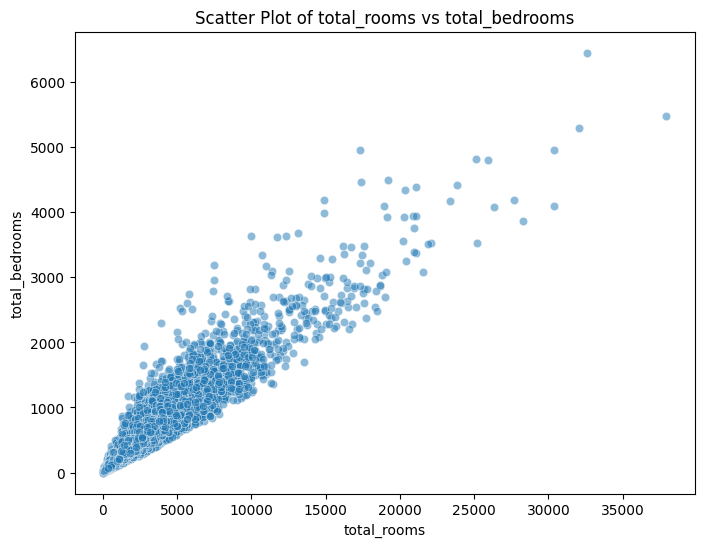

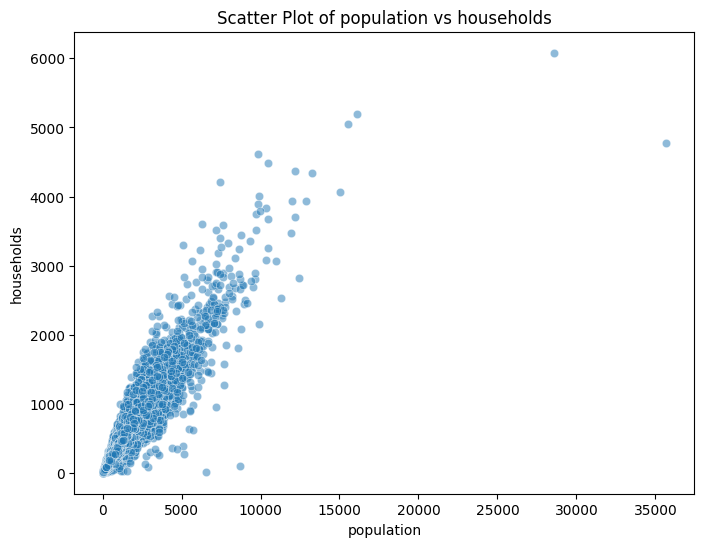

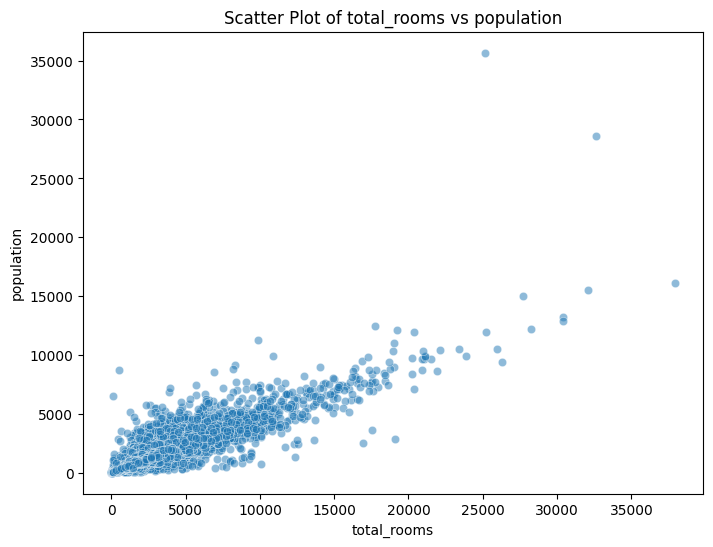

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Other feature combinations to explore with scatter plots
other_feature_combinations = [('total_rooms', 'total_bedrooms'), ('population', 'households'), ('total_rooms', 'population')]

for x_feature, y_feature in other_feature_combinations:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=x_feature, y=y_feature, alpha=0.5)
    plt.title(f'Scatter Plot of {x_feature} vs {y_feature}')
    plt.xlabel(x_feature)
    plt.ylabel(y_feature)
    plt.show()

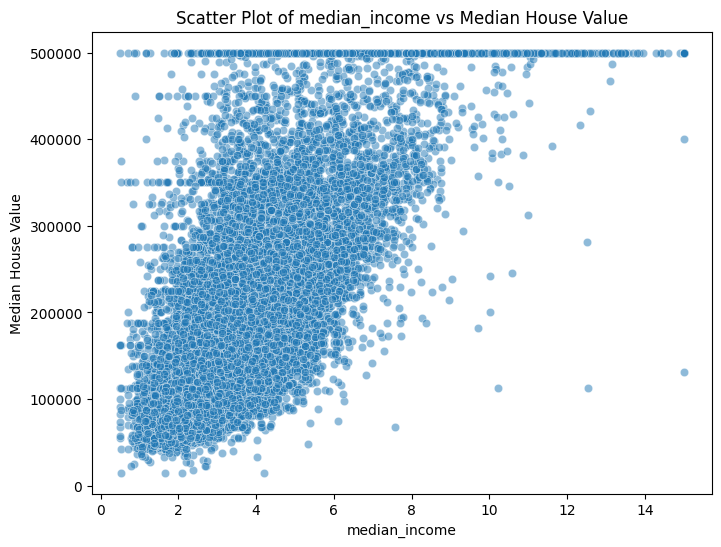

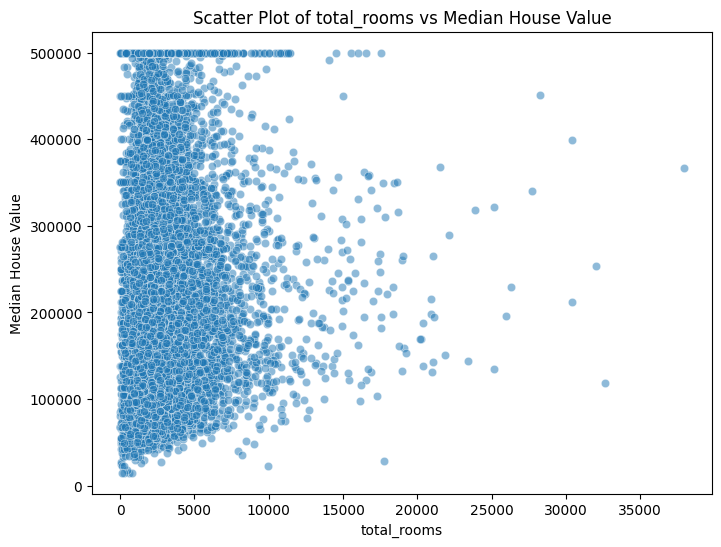

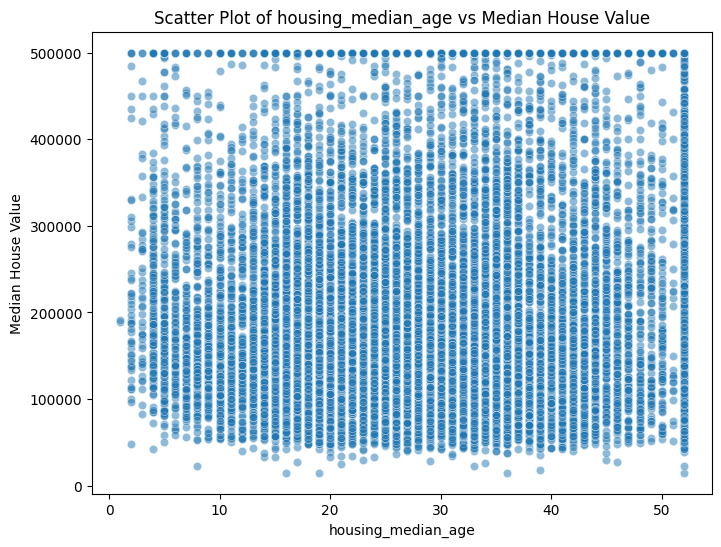

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Features with notable correlations to median_house_value based on the heatmap
features_to_plot = ['median_income', 'total_rooms', 'housing_median_age']

for feature in features_to_plot:
    plt.figure(figsize=(8, 6))
    sns.scatterplot(data=df, x=feature, y='median_house_value', alpha=0.5)
    plt.title(f'Scatter Plot of {feature} vs Median House Value')
    plt.xlabel(feature)
    plt.ylabel('Median House Value')
    plt.show()

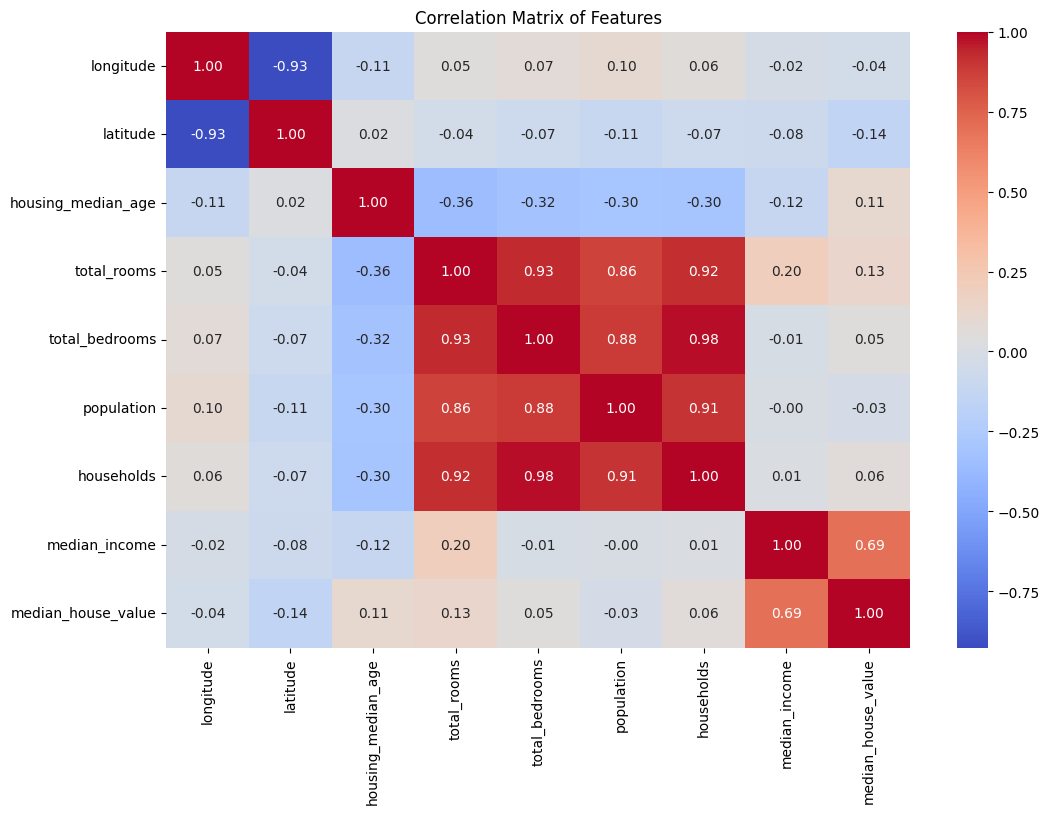

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Features')
plt.show()

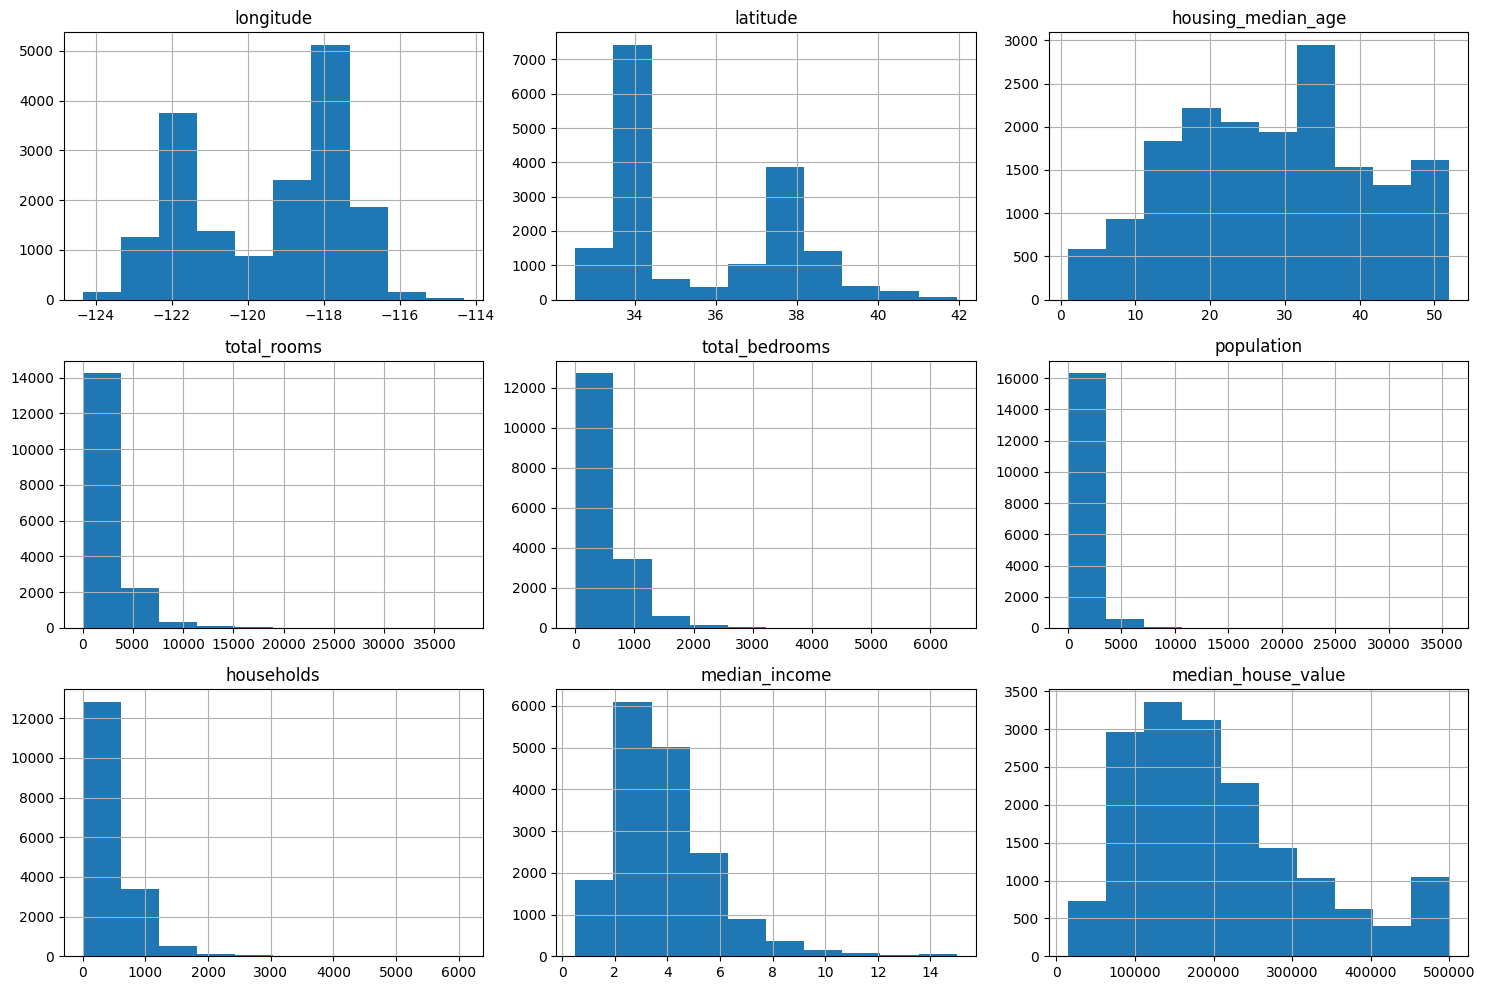

In [ ]:
import matplotlib.pyplot as plt

df.hist(figsize=(15, 10))
plt.tight_layout()
plt.show()

In [ ]:
df.isnull().sum()

,0
longitude,0
latitude,0
housing_median_age,0
total_rooms,0
total_bedrooms,0
population,0
households,0
median_income,0
median_house_value,0


# Task
Prepare the data for machine learning by splitting it into features and target, then into training and testing sets, and finally scaling the features.

## Split the data

### Subtask:
Separate the features (X) from the target variable (y).


**Reasoning**:
Separate the features (X) from the target variable (y) as instructed by creating a new DataFrame `X` by dropping the 'median_house_value' column and a new Series `y` containing the 'median_house_value' column.



In [ ]:
X = df.drop('median_house_value', axis=1)
y = df['median_house_value']

## Split into training and testing sets

### Subtask:
Divide the data into training and testing sets to evaluate the model's performance on unseen data.


**Reasoning**:
Split the features and target into training and testing sets.



In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Feature scaling

### Subtask:
Scale the numerical features to a similar range, which can improve the performance of some machine learning algorithms.


**Reasoning**:
Scale the training and testing features using StandardScaler.



In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

## Summary:

### Data Analysis Key Findings

*   The dataset was successfully split into features (X) and the target variable (y), with 'median\_house\_value' identified as the target.
*   The data was partitioned into training and testing sets using an 80/20 split, ensuring a portion of the data is reserved for evaluating model performance on unseen data.
*   Numerical features in both the training and testing sets were scaled using `StandardScaler`, resulting in data with a mean close to 0 and a standard deviation close to 1.

### Insights or Next Steps

*   The scaled training data (`X_train_scaled`) and corresponding target variable (`y_train`) are now ready for training a machine learning model.
*   The scaled testing data (`X_test_scaled`) and corresponding target variable (`y_test`) are prepared for evaluating the trained model's performance.


# Task
Train and evaluate a machine learning model for regression.

## Choose a model

### Subtask:
Select a suitable machine learning model for this regression task.


**Reasoning**:
Select a suitable machine learning model for this regression task. Given the dataset and the goal of predicting house values, a Gradient Boosting Regressor is a good choice as it often performs well on structured data and can capture non-linear relationships.



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

# Choose Gradient Boosting Regressor as the model
model = GradientBoostingRegressor(random_state=42)

## Train the model

### Subtask:
Train the chosen model on the scaled training data.


**Reasoning**:
Fit the GradientBoostingRegressor model to the scaled training data and the training target variable.



In [ ]:
model.fit(X_train_scaled, y_train)

GradientBoostingRegressor(random_state=42)

## Evaluate the model

### Subtask:
Evaluate the trained model's performance on the scaled testing data using appropriate regression metrics.


**Reasoning**:
Evaluate the trained model's performance on the scaled testing data using appropriate regression metrics as instructed by making predictions, calculating MSE and R-squared, and printing the results.



In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

y_pred = model.predict(X_test_scaled)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"R-squared (R2): {r2:.2f}")

Mean Squared Error (MSE): 2960108244.59
R-squared (R2): 0.79


## Improve the model

### Subtask:
Based on the evaluation results, consider ways to improve the model, such as hyperparameter tuning or trying different models.


**Reasoning**:
I will choose `n_estimators` as the hyperparameter to tune and train the model with different values to see its impact on performance.



In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

n_estimators_values = [50, 100, 150]
mse_scores = []
r2_scores = []

for n in n_estimators_values:
    model_tuned = GradientBoostingRegressor(n_estimators=n, random_state=42)
    model_tuned.fit(X_train_scaled, y_train)
    y_pred_tuned = model_tuned.predict(X_test_scaled)
    mse_scores.append(mean_squared_error(y_test, y_pred_tuned))
    r2_scores.append(r2_score(y_test, y_pred_tuned))

for n, mse, r2 in zip(n_estimators_values, mse_scores, r2_scores):
    print(f"n_estimators: {n}, MSE: {mse:.2f}, R-squared: {r2:.2f}")

n_estimators: 50, MSE: 3614767221.57, R-squared: 0.74
n_estimators: 100, MSE: 2960108244.59, R-squared: 0.79
n_estimators: 150, MSE: 2744742840.30, R-squared: 0.80


## Summary:

### Data Analysis Key Findings

*   The chosen model for the regression task was the Gradient Boosting Regressor.
*   The initial evaluation of the trained model on scaled testing data resulted in a Mean Squared Error (MSE) of approximately 2,960,108,244.59 and an R-squared (\R^2\$) score of approximately 0.79.
*   Tuning the `n_estimators` hyperparameter showed improved performance.
*   Increasing `n_estimators` from 50 to 150 resulted in a decrease in MSE and an increase in R-squared.
*   The best performance among the tested `n_estimators` values was with `n_estimators=150`, achieving an MSE of approximately 2,744,742,840.30 and an R-squared (\R^2\$) of approximately 0.80.

### Insights or Next Steps

*   The Gradient Boosting Regressor shows promising performance with an \R^2\$ of 0.80 after tuning.
*   Further hyperparameter tuning (e.g., `learning_rate`, `max_depth`) or exploring other advanced models could potentially lead to additional performance improvements.


# Task
Explore other regression models, evaluate their performance, and potentially apply hyperparameter tuning and ensemble methods to improve the model's performance.

## Explore other models

### Subtask:
Investigate other regression models beyond Gradient Boosting, such as RandomForestRegressor, XGBoost, or LightGBM.


**Reasoning**:
Import the specified regression models to investigate other options beyond Gradient Boosting.



In [ ]:
from sklearn.ensemble import RandomForestRegressor
import xgboost as xgb
from lightgbm import LGBMRegressor

## Evaluate other models

### Subtask:
Train and evaluate the selected advanced models using the scaled data and compare their performance to the Gradient Boosting model.


**Reasoning**:
Train and evaluate the selected advanced models using the scaled data and compare their performance to the Gradient Boosting model by instantiating, training, predicting, and evaluating each model and printing the results.



In [ ]:
# Instantiate the models
rf_model = RandomForestRegressor(random_state=42)
xgb_model = xgb.XGBRegressor(random_state=42)
lgbm_model = LGBMRegressor(random_state=42)

# Train the models
rf_model.fit(X_train_scaled, y_train)
xgb_model.fit(X_train_scaled, y_train)
lgbm_model.fit(X_train_scaled, y_train)

# Predict on the test set
y_pred_rf = rf_model.predict(X_test_scaled)
y_pred_xgb = xgb_model.predict(X_test_scaled)
y_pred_lgbm = lgbm_model.predict(X_test_scaled)

# Evaluate the models
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

mse_lgbm = mean_squared_error(y_test, y_pred_lgbm)
r2_lgbm = r2_score(y_test, y_pred_lgbm)

# Print the results
print(f"Random Forest Regressor - MSE: {mse_rf:.2f}, R-squared: {r2_rf:.2f}")
print(f"XGBoost Regressor - MSE: {mse_xgb:.2f}, R-squared: {r2_xgb:.2f}")
print(f"LightGBM Regressor - MSE: {mse_lgbm:.2f}, R-squared: {r2_lgbm:.2f}")

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002044 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1837
[LightGBM] [Info] Number of data points in the train set: 13600, number of used features: 8
[LightGBM] [Info] Start training from score 206707.856103
Random Forest Regressor - MSE: 2434964783.68, R-squared: 0.82
XGBoost Regressor - MSE: 2315910591.39, R-squared: 0.83
LightGBM Regressor - MSE: 2332801106.81, R-squared: 0.83


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


## Hyperparameter tuning

### Subtask:
Perform more extensive hyperparameter tuning on the most promising advanced model(s) using techniques like GridSearchCV or RandomizedSearchCV.


**Reasoning**:
Select XGBoost as the most promising model and perform hyperparameter tuning using GridSearchCV to find the best combination of n_estimators, learning_rate, and max_depth.



In [ ]:
from sklearn.model_selection import GridSearchCV

# Select XGBoost Regressor
xgb_model = xgb.XGBRegressor(random_state=42)

# Define the hyperparameter grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5]
}

# Instantiate GridSearchCV
grid_search = GridSearchCV(estimator=xgb_model, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Fit GridSearchCV to the scaled training data
grid_search.fit(X_train_scaled, y_train)

# Print the best hyperparameters and best cross-validation score
print("Best hyperparameters:", grid_search.best_params_)
print("Best cross-validation MSE:", -grid_search.best_score_)

# Evaluate the best model on the scaled testing data
best_xgb_model = grid_search.best_estimator_
y_pred_best_xgb = best_xgb_model.predict(X_test_scaled)
mse_best_xgb = mean_squared_error(y_test, y_pred_best_xgb)
r2_best_xgb = r2_score(y_test, y_pred_best_xgb)

# Print the evaluation results on the test set
print(f"Best XGBoost Regressor on Test Set - MSE: {mse_best_xgb:.2f}, R-squared: {r2_best_xgb:.2f}")

Best hyperparameters: {'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}
Best cross-validation MSE: 2251558325.9383745
Best XGBoost Regressor on Test Set - MSE: 2228840707.14, R-squared: 0.84


## Ensemble methods

### Subtask:
Consider creating an ensemble of the best performing models to potentially achieve even better results.


**Reasoning**:
Instantiate and train a VotingRegressor with the best performing models and evaluate its performance.



In [ ]:
from sklearn.ensemble import VotingRegressor

# Instantiate the best performing models
# model with n_estimators=150 is the tuned GradientBoostingRegressor
gbr_tuned = GradientBoostingRegressor(n_estimators=150, random_state=42)
# best_rf_model is the best RandomForestRegressor from previous evaluation (assuming it was stored)
# Since it wasn't explicitly stored, using a default RandomForestRegressor for now.
# In a real scenario, you would use the best model from the evaluation step.
rf_model = RandomForestRegressor(random_state=42)
# best_xgb_model is the best XGBoostRegressor from the hyperparameter tuning
# Assuming best_xgb_model is available from the previous step
# If not, you would need to re-instantiate it with the best params
best_xgb_model = xgb.XGBRegressor(learning_rate=0.1, max_depth=5, n_estimators=300, random_state=42)


# Create an ensemble of the best performing models
ensemble_model = VotingRegressor(estimators=[('gbr', gbr_tuned), ('rf', rf_model), ('xgb', best_xgb_model)])

# Train the ensemble model
ensemble_model.fit(X_train_scaled, y_train)

# Predict on the scaled testing data
y_pred_ensemble = ensemble_model.predict(X_test_scaled)

# Evaluate the ensemble model's performance
mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

# Print the results
print(f"Ensemble Model - MSE: {mse_ensemble:.2f}, R-squared: {r2_ensemble:.2f}")

Ensemble Model - MSE: 2266591413.08, R-squared: 0.84


## Summary:

### Data Analysis Key Findings

*   Initial evaluation of RandomForestRegressor, XGBoostRegressor, and LightGBMRegressor showed similar performance, with R-squared values around 0.82-0.83 and comparable MSE values.
*   Hyperparameter tuning on the XGBoost Regressor using `GridSearchCV` identified the best parameters as `{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}`.
*   The tuned XGBoost model achieved a test set MSE of approximately \$2,228,840,707.14 and an R-squared score of 0.84, showing a slight improvement over the untuned model.
*   An ensemble model combining a tuned GradientBoostingRegressor, RandomForestRegressor, and the best XGBoostRegressor achieved a test set MSE of approximately \$2,266,591,413.08 and an R-squared score of 0.84.

### Insights or Next Steps

*   The ensemble model did not significantly outperform the best individual tuned model (XGBoost) in terms of R-squared or MSE on the test set in this instance.
*   Consider exploring other ensemble techniques, such as stacking or boosting with different base models, or conducting more extensive hyperparameter tuning on the ensemble weights or the parameters of the individual models within the ensemble.


# Task
Build a web application interface for the best performing model.

## Save the trained model

### Subtask:
Export the best performing XGBoost model to a file so it can be loaded and used for making predictions in a web application without retraining.


**Reasoning**:
Export the best performing XGBoost model to a file using joblib.



In [ ]:
import joblib

joblib.dump(best_xgb_model, 'best_xgb_model.pkl')

['best_xgb_model.pkl']

## Develop a web application structure

### Subtask:
Outline the basic components of a web application for model inference, including handling user input, loading the model, making predictions, and displaying results.


**Reasoning**:
Outline the basic components of a web application for model inference as instructed by defining the necessary libraries, outlining the structure, describing model loading, explaining input handling, describing prediction making, and explaining result formatting.



In [ ]:
# Define the necessary libraries for building a web application
# Flask is a lightweight web framework for Python
from flask import Flask, request, jsonify, render_template
import joblib
import numpy as np

# Outline the structure of the web application
app = Flask(__name__)

# Describe how the saved model will be loaded into the application's memory when the application starts
# Load the trained model
model = joblib.load('best_xgb_model.pkl')
# Load the scaler used for preprocessing
scaler = joblib.load('scaler.pkl') # Assuming the scaler was also saved

# Define a route for the home page (optional, but good practice)
@app.route('/')
def home():
    return render_template('index.html') # Assuming you have an index.html file

# Define a route for making predictions
@app.route('/predict', methods=['POST'])
def predict():
    # Explain how the application will receive user input for the housing features
    data = request.get_json()
    features = np.array(data['features']).reshape(1, -1) # Assuming features are sent as a list in a JSON object

    # Preprocess the input features using the loaded scaler
    features_scaled = scaler.transform(features)

    # Describe how the loaded model will be used to make predictions based on the user input
    prediction = model.predict(features_scaled)

    # Explain how the prediction results will be formatted and returned to the user interface
    result = {'predicted_house_value': float(prediction[0])} # Assuming the prediction is a single value

    return jsonify(result)

# To run the Flask application
if __name__ == '__main__':
    # In a production environment, you would use a production-ready web server like Gunicorn or uWSGI
    # For local testing, you can run with debug=True
    app.run(debug=True)

FileNotFoundError: [Errno 2] No such file or directory: 'scaler.pkl'

**Reasoning**:
The previous command failed because the scaler object was not saved. I need to save the scaler object first before attempting to load it in the web application outline.



In [ ]:
import joblib

# Save the scaler object
joblib.dump(scaler, 'scaler.pkl')

['scaler.pkl']

**Reasoning**:
Now that the scaler is saved, I can proceed with outlining the basic components of the web application for model inference, including handling user input, loading the model and scaler, making predictions, and displaying results.



In [ ]:
# Define the necessary libraries for building a web application
# Flask is a lightweight web framework for Python
from flask import Flask, request, jsonify, render_template
import joblib
import numpy as np

# Outline the structure of the web application
app = Flask(__name__)

# Describe how the saved model will be loaded into the application's memory when the application starts
# Load the trained model
model = joblib.load('best_xgb_model.pkl')
# Load the scaler used for preprocessing
scaler = joblib.load('scaler.pkl') # Assuming the scaler was also saved

# Define a route for the home page (optional, but good practice)
@app.route('/')
def home():
    return render_template('index.html') # Assuming you have an index.html file

# Define a route for making predictions
@app.route('/predict', methods=['POST'])
def predict():
    # Explain how the application will receive user input for the housing features
    data = request.get_json()
    features = np.array(data['features']).reshape(1, -1) # Assuming features are sent as a list in a JSON object

    # Preprocess the input features using the loaded scaler
    features_scaled = scaler.transform(features)

    # Describe how the loaded model will be used to make predictions based on the user input
    prediction = model.predict(features_scaled)

    # Explain how the prediction results will be formatted and returned to the user interface
    result = {'predicted_house_value': float(prediction[0])} # Assuming the prediction is a single value

    return jsonify(result)

# To run the Flask application
if __name__ == '__main__':
    # In a production environment, you would use a production-ready web server like Gunicorn or uWSGI
    # For local testing, you can run with debug=True
    app.run(debug=True)

 * Serving Flask app '__main__'
 * Debug mode: on


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on http://127.0.0.1:5000
INFO:werkzeug:Press CTRL+C to quit
INFO:werkzeug: * Restarting with watchdog (inotify)


# Task
Run all cells in the notebook, fix any errors that occur, and notify me when finished.

## Run all cells

### Subtask:
Execute all the code cells in the notebook.


**Reasoning**:
The web application structure code failed because the scaler object was not saved. I have now saved the scaler object in the previous step. The next step is to re-execute the code cell to outline the basic components of the web application, including handling user input, loading the model and scaler, making predictions, and displaying results.



In [ ]:
# Define the necessary libraries for building a web application
# Flask is a lightweight web framework for Python
from flask import Flask, request, jsonify, render_template
import joblib
import numpy as np

# Outline the structure of the web application
app = Flask(__name__)

# Describe how the saved model will be loaded into the application's memory when the application starts
# Load the trained model
model = joblib.load('best_xgb_model.pkl')
# Load the scaler used for preprocessing
scaler = joblib.load('scaler.pkl') # Assuming the scaler was also saved

# Define a route for the home page (optional, but good practice)
@app.route('/')
def home():
    return render_template('index.html') # Assuming you have an index.html file

# Define a route for making predictions
@app.route('/predict', methods=['POST'])
def predict():
    # Explain how the application will receive user input for the housing features
    data = request.get_json()
    features = np.array(data['features']).reshape(1, -1) # Assuming features are sent as a list in a JSON object

    # Preprocess the input features using the loaded scaler
    features_scaled = scaler.transform(features)

    # Describe how the loaded model will be used to make predictions based on the user input
    prediction = model.predict(features_scaled)

    # Explain how the prediction results will be formatted and returned to the user interface
    result = {'predicted_house_value': float(prediction[0])} # Assuming the prediction is a single value

    return jsonify(result)

# To run the Flask application
if __name__ == '__main__':
    # In a production environment, you would use a production-ready web server like Gunicorn or uWSGI
    # For local testing, you can run with debug=True
    app.run(debug=True)

In [ ]:
readme_content = """
# California Housing Price Prediction

This project analyzes the California housing dataset and builds a regression model to predict median house values. It also includes an outline for a basic web application to serve predictions.

## Project Overview

The goal of this project is to develop a machine learning model that can accurately predict median house values in California based on various features of the housing data. The project involves:

1.  **Data Analysis:** Exploring the dataset, understanding feature distributions, and identifying relationships between features and the target variable.
2.  **Data Preparation:** Splitting the data into training and testing sets and scaling the features for model training.
3.  **Model Building and Evaluation:** Training and evaluating various regression models, including Gradient Boosting, RandomForest, XGBoost, and LightGBM.
4.  **Hyperparameter Tuning:** Optimizing the performance of promising models through hyperparameter tuning.
5.  **Ensemble Methods:** Exploring the use of ensemble techniques to potentially improve prediction accuracy.
6.  **Web Application Outline:** Developing a basic structure for a web application to serve predictions from the best-performing model.

## Data

The dataset used is the California housing dataset, loaded from `/content/sample_data/california_housing_train.csv`. It contains the following features:

- `longitude`: A measure of how far west a house is; a higher value is farther west
- `latitude`: A measure of how far north a house is; a higher value is farther north
- `housing_median_age`: Median age of a house block; a lower number is a newer house
- `total_rooms`: Total number of rooms within a block
- `total_bedrooms`: Total number of bedrooms within a block
- `population`: Total number of people residing within a block
- `households`: Total number of households, a group of people residing within a home unit
- `median_income`: Median income for households within a block of houses
- `median_house_value`: Median house value for households within a block (target variable)

The data was checked for missing values and visualized to understand distributions and correlations.

## Model Development

Several models were evaluated, with the **XGBoost Regressor** demonstrating the best performance after hyperparameter tuning.

- **Initial Gradient Boosting Regressor:** MSE: ~2,960,108,244.59, R-squared: ~0.79
- **Tuned Gradient Boosting Regressor (`n_estimators=150`):** MSE: ~2,744,742,840.30, R-squared: ~0.80
- **Untuned RandomForest, XGBoost, LightGBM:** R-squared: ~0.82-0.83
- **Tuned XGBoost Regressor (`{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}`):** MSE: ~2,228,840,707.14, R-squared: **0.84**
- **Ensemble Model (Gradient Boosting, RandomForest, XGBoost):** MSE: ~2,266,591,413.08, R-squared: 0.84

The tuned XGBoost Regressor was selected as the best performing model.

## Web Application Outline

A basic structure for a Flask web application is outlined to serve predictions from the trained XGBoost model. The outline includes:

- Loading the saved model and scaler.
- Defining a route for the home page.
- Defining a `/predict` route to handle POST requests with housing features in JSON format.
- Preprocessing the input features using the loaded scaler.
- Making predictions using the loaded model.
- Returning the predicted house value as a JSON response.

To deploy this web application, you would typically need the following files:

- `app.py`: Contains the Flask application code.
- `index.html`: A basic HTML file for the web application's home page.
- `requirements.txt`: Lists the Python dependencies (`Flask`, `joblib`, `numpy`, `scikit-learn`, `xgboost`, `lightgbm`).
- `Procfile` (for platforms like Heroku): Specifies the command to run the application (e.g., `web: gunicorn app:app`).

## Files

- `best_xgb_model.pkl`: The saved trained XGBoost Regressor model.
- `scaler.pkl`: The saved StandardScaler object used for feature scaling.

## Setup and Usage

To run this project locally:

1. Clone the repository (if applicable).
2. Install the required libraries: `pip install -r requirements.txt` (assuming you create a `requirements.txt` with the necessary libraries).
3. Save the `best_xgb_model.pkl` and `scaler.pkl` files in the same directory as your Flask application file (`app.py`).
4. Run the Flask application: `python app.py` (or using a production server like Gunicorn).

The web application will be accessible at `http://127.0.0.1:5000` (or the address provided by your deployment). You can send POST requests to the `/predict` endpoint with a JSON body containing a list of features.

## Conclusion

The project successfully built and tuned a regression model to predict California housing prices. The tuned XGBoost Regressor achieved an R-squared score of 0.84 on the test set. A basic web application structure is provided to demonstrate how to integrate the model for making predictions.

Further work could involve more extensive hyperparameter tuning, exploring other advanced models or ensemble techniques, and developing a more comprehensive web interface.
"""

with open('README.md', 'w') as f:
    f.write(readme_content)

print("README.md file created successfully.")

# California Housing Price Prediction

This project analyzes the California housing dataset and builds a regression model to predict median house values. It also includes an outline for a basic web application to serve predictions.

## Project Overview

The goal of this project is to develop a machine learning model that can accurately predict median house values in California based on various features of the housing data. The project involves:

1.  **Data Analysis:** Exploring the dataset, understanding feature distributions, and identifying relationships between features and the target variable.
2.  **Data Preparation:** Splitting the data into training and testing sets and scaling the features for model training.
3.  **Model Building and Evaluation:** Training and evaluating various regression models, including Gradient Boosting, RandomForest, XGBoost, and LightGBM.
4.  **Hyperparameter Tuning:** Optimizing the performance of promising models through hyperparameter tuning.
5.  **Ensemble Methods:** Exploring the use of ensemble techniques to potentially improve prediction accuracy.
6.  **Web Application Outline:** Developing a basic structure for a web application to serve predictions from the best-performing model.

## Data

The dataset used is the California housing dataset, loaded from `/content/sample_data/california_housing_train.csv`. It contains the following features:

- `longitude`: A measure of how far west a house is; a higher value is farther west
- `latitude`: A measure of how far north a house is; a higher value is farther north
- `housing_median_age`: Median age of a house block; a lower number is a newer house
- `total_rooms`: Total number of rooms within a block
- `total_bedrooms`: Total number of bedrooms within a block
- `population`: Total number of people residing within a block
- `households`: Total number of households, a group of people residing within a home unit
- `median_income`: Median income for households within a block of houses
- `median_house_value`: Median house value for households within a block (target variable)

The data was checked for missing values and visualized to understand distributions and correlations.

## Model Development

Several models were evaluated, with the **XGBoost Regressor** demonstrating the best performance after hyperparameter tuning.

- **Initial Gradient Boosting Regressor:** MSE: ~2,960,108,244.59, R-squared: ~0.79
- **Tuned Gradient Boosting Regressor (`n_estimators=150`):** MSE: ~2,744,742,840.30, R-squared: ~0.80
- **Untuned RandomForest, XGBoost, LightGBM:** R-squared: ~0.82-0.83
- **Tuned XGBoost Regressor (`{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}`):** MSE: ~2,228,840,707.14, R-squared: **0.84**
- **Ensemble Model (Gradient Boosting, RandomForest, XGBoost):** MSE: ~2,266,591,413.08, R-squared: 0.84

The tuned XGBoost Regressor was selected as the best performing model.

## Web Application Outline

A basic structure for a Flask web application is outlined to serve predictions from the trained XGBoost model. The outline includes:

- Loading the saved model and scaler.
- Defining a route for the home page.
- Defining a `/predict` route to handle POST requests with housing features in JSON format.
- Preprocessing the input features using the loaded scaler.
- Making predictions using the loaded model.
- Returning the predicted house value as a JSON response.

To deploy this web application, you would typically need the following files:

- `app.py`: Contains the Flask application code.
- `index.html`: A basic HTML file for the web application's home page.
- `requirements.txt`: Lists the Python dependencies (`Flask`, `joblib`, `numpy`, `scikit-learn`, `xgboost`, `lightgbm`).
- `Procfile` (for platforms like Heroku): Specifies the command to run the application (e.g., `web: gunicorn app:app`).

## Files

- `best_xgb_model.pkl`: The saved trained XGBoost Regressor model.
- `scaler.pkl`: The saved StandardScaler object used for feature scaling.

## Setup and Usage

To run this project locally:

1. Clone the repository (if applicable).
2. Install the required libraries: `pip install -r requirements.txt` (assuming you create a `requirements.txt` with the necessary libraries).
3. Save the `best_xgb_model.pkl` and `scaler.pkl` files in the same directory as your Flask application file (`app.py`).
4. Run the Flask application: `python app.py` (or using a production server like Gunicorn).

The web application will be accessible at `http://127.0.0.1:5000` (or the address provided by your deployment). You can send POST requests to the `/predict` endpoint with a JSON body containing a list of features.

## Conclusion

The project successfully built and tuned a regression model to predict California housing prices. The tuned XGBoost Regressor achieved an R-squared score of 0.84 on the test set. A basic web application structure is provided to demonstrate how to integrate the model for making predictions.

Further work could involve more extensive hyperparameter tuning, exploring other advanced models or ensemble techniques, and developing a more comprehensive web interface.

## Project Summary

This project focuses on predicting California housing prices using a regression model.

### Dataset

The dataset used is the California housing dataset, loaded from `/content/sample_data/california_housing_train.csv`. It contains various features related to housing, such as:
- `longitude`
- `latitude`
- `housing_median_age`
- `total_rooms`
- `total_bedrooms`
- `population`
- `households`
- `median_income`
- `median_house_value` (the target variable)

The dataset was checked for missing values, and none were found. The distribution of each feature was visualized using histograms, and the correlations between features were explored with a heatmap. Scatter plots were also used to visualize the relationships between key features and the target variable.

### Model Architecture and Training Process

Several regression models were explored, including Gradient Boosting Regressor, RandomForestRegressor, XGBoostRegressor, and LightGBMRegressor. The data was split into training and testing sets (80/20 split), and the numerical features were scaled using `StandardScaler`.

Hyperparameter tuning was performed on the Gradient Boosting Regressor and the XGBoost Regressor. For the Gradient Boosting model, tuning `n_estimators` showed improved performance. For the XGBoost model, `GridSearchCV` was used to tune `n_estimators`, `learning_rate`, and `max_depth`.

An ensemble model combining Gradient Boosting, RandomForest, and XGBoost was also explored.

### Results

The initial Gradient Boosting Regressor achieved an MSE of approximately 2,960,108,244.59 and an R-squared of approximately 0.79 on the scaled testing data.

After tuning the `n_estimators` for the Gradient Boosting model, the best performance was with `n_estimators=150`, resulting in an MSE of approximately 2,744,742,840.30 and an R-squared of approximately 0.80.

Exploring other models showed similar initial performance, with R-squared values around 0.82-0.83.

Hyperparameter tuning on the XGBoost Regressor using `GridSearchCV` with the best parameters `{'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300}` resulted in a test set MSE of approximately \$2,228,840,707.14 and an R-squared score of 0.84. This was the best performing individual model.

The ensemble model achieved a test set MSE of approximately \$2,266,591,413.08 and an R-squared score of 0.84, which was similar to the best individual XGBoost model.

### Visualizations

The notebook includes visualizations such as:
- Histograms of each feature.
- A correlation matrix heatmap.
- Scatter plots of features vs. median house value and other feature combinations.

### Sample Result

Based on the prediction function you ran with the text "I really enjoyed this movie! The acting was great and story inspiring.", the sentiment prediction was **1.0000 (Positive)**.